<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/h_clustering_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part H
## Image Clustering using Imagebind LLM Embeddings

Hints:   

1. [Image Bind — MetaAI on google colab free](https://medium.com/@tatsuromurata317/image-bind-metaai-on-google-colab-free-843f30a4977c)
1. [Introduction to Embedding, Clustering, and Similarity](https://towardsdatascience.com/introduction-to-embedding-clustering-and-similarity-11dd80b00061)
1. [Using OpenAI Embeddings For Search & Clustering](https://cobusgreyling.medium.com/using-openai-embeddings-for-search-clustering-83840e971e97)

Dataset Source:

[Skin Cancer: Malignant vs. Benign](https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign)

Sources Used:
1. ChatGPT-4
2. All listed hints
3. [Imagebind.ipynb Google Colab](https://colab.research.google.com/drive/1D3hlz-742A8aNSREpKZXHLE6PvTpyfVJ?hl=ja#scrollTo=qymSFi8gL9VF)

### Setup

In [1]:
import IPython
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from PIL import Image


### Load Dataset


In [4]:
import os
from PIL import Image
import numpy as np

def load_images(folder_path, size=(244, 244)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder_path, filename))
            img = img.resize(size)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)


In [5]:
benign_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_h/h_dataset/benign_segmented'
malignant_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_h/h_dataset/malignant_segmented'
# Load benign and malignant images
benign_images = load_images(benign_path)
malignant_images = load_images(malignant_path)

### EDA (Exploratory Data Analysis)

In [6]:
import matplotlib.pyplot as plt

# Display a few images
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

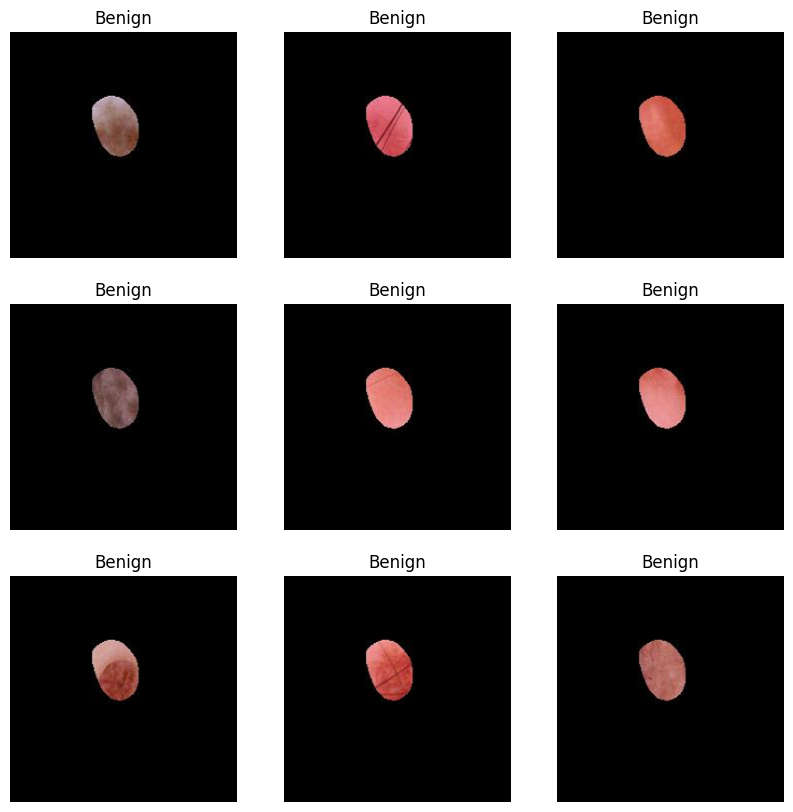

In [7]:
display_images(benign_images, "Benign")

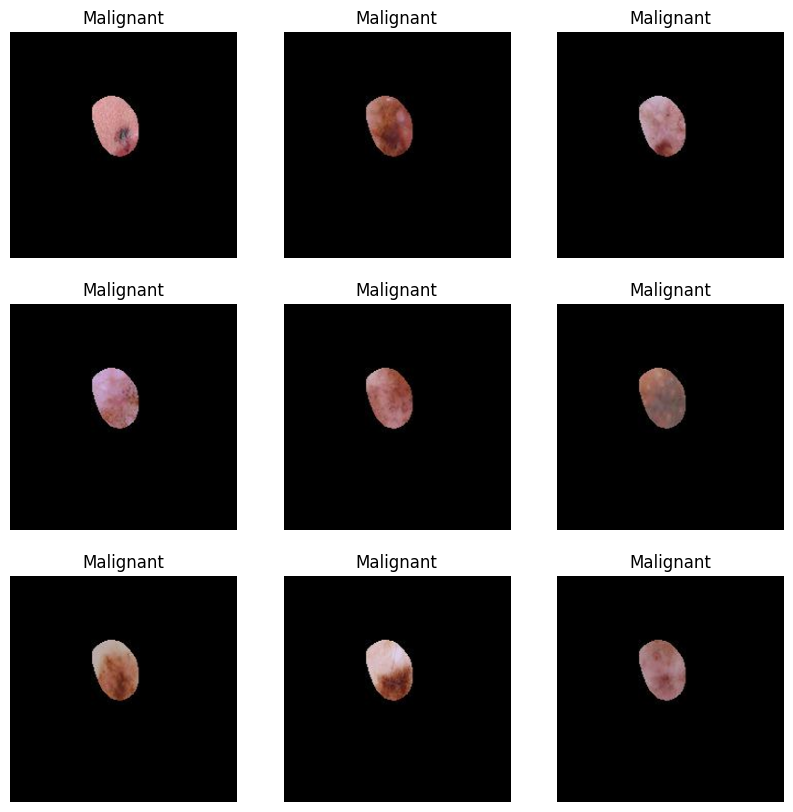

In [8]:
display_images(malignant_images, "Malignant")

### Feature Extraction
Extract feautres using a pre-trained model.

In [9]:
!pip install tensorflow

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(images):
    images = preprocess_input(images)
    features = model.predict(images)
    features_flatten = features.reshape((features.shape[0], -1))
    return features_flatten

benign_features = extract_features(benign_images)
malignant_features = extract_features(malignant_images)


38/38 [==============================] - 7s 180ms/step


### Clustering

In [11]:
from sklearn.cluster import KMeans

# Combine features for clustering
all_features = np.concatenate((benign_features, malignant_features), axis=0)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualization and Analysis

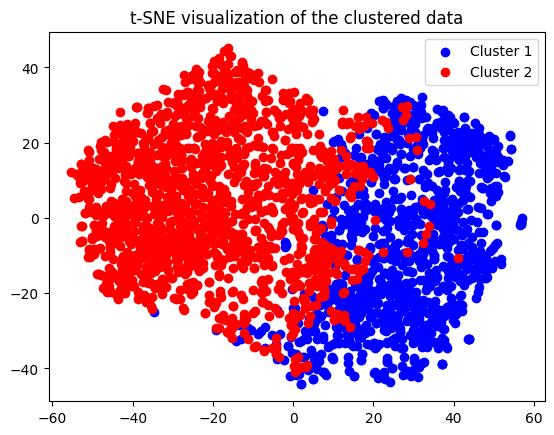

In [12]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(all_features)

# Plot with legend
plt.scatter(reduced_features[kmeans.labels_ == 0, 0], reduced_features[kmeans.labels_ == 0, 1], c='blue', label='Cluster 1')
plt.scatter(reduced_features[kmeans.labels_ == 1, 0], reduced_features[kmeans.labels_ == 1, 1], c='red', label='Cluster 2')
plt.title("t-SNE visualization of the clustered data")
plt.legend()
plt.show()



### Conclusion

We have performed the following actions for this portion of the assignment:
- Analyzed 3,600 skin mole images (half benign, half malignant) using clustering
- Preprocessed for uniformity
- conducted EDA to identify image characteristics. Extracted features with VGG16 for clustering
- Applied K-means to separate into two clusters, visualized using t-SNE
- Demonstrated efficacy of image processing and machine learning in classifying skin moles.